In [435]:
import pandas as pd
import numpy as np

shark_data_unclean = pd.read_csv('data/data_adding_more_weather.csv', encoding = "ISO-8859-1")

In [436]:
shark_data_unclean = shark_data_unclean.drop("Unnamed: 0" , 1)
shark_data_unclean['Age'] = pd.to_numeric(shark_data_unclean['Age'], errors='coerce')
shark_data_unclean['Time'] = pd.to_numeric(shark_data_unclean['Time'], errors='coerce')
shark_data_unclean = shark_data_unclean.dropna(subset=["Activity"])

In [437]:
shark_data_unclean.value_counts("Type")

Type
Unprovoked    3548
Provoked       425
dtype: int64

In [438]:
shark_data_unclean = shark_data_unclean[shark_data_unclean["Activity"] != "nan"]

In [439]:
shark_data_unclean

,Unnamed: 0.1,Date,Type,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Proper_date,Full Location,latitude,longitude,avg_temp,precipitation,wind_speed,sea_level_pressure
0,1,09-Sep-2021,Unprovoked,surfing,M,6.0,Minor injury to right arm,N,1320.0,Not Determined,09-Sep-2021,"USA Florida Ponce Inlet, Volusia County",29.096373,-80.936998,26.1,1.0,16.2,1012.5
1,2,05-Sep-2021,Unprovoked,surfing,M,31.0,FATAL,Y,1030.0,White xhark,05-Sep-2021,AUSTRALIA New South Wales Emerald Beach,-30.157479,153.150195,13.6,4.6,20.4,1017.3
2,4,28-Aug-2021,Unprovoked,boarding,M,NaN,Lacerations both sides of lower leg immediatel...,N,1145.0,Not Determined,28-Aug-2021,"USA Texas Galveston Island, Galveston County",29.241005,-94.909133,29.4,2.5,10.4,1013.7
3,5,03-Sep-2021,Unprovoked,fell,M,64.0,Severe injury to leg,N,1400.0,Not Determined,03-Sep-2021,USA Louisiana off Grand Isle,29.236617,-89.987294,27.2,3.9,5.1,1014.6
4,6,21-Aug-2021,Unprovoked,surfing,M,41.0,Left ankle and foot bitten,N,640.0,Bull shark,21-Aug-2021,"USA Florida Walton Beach Psrk, St. Lucie County",27.337890,-80.233431,28.9,0.2,11.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,5943,14-Nov-1900,Unprovoked,swimming,M,30.0,"FATAL, legs severed",Y,9999.0,Not Determined,14-Nov-1900,SOUTH AFRICA Western Cape Province Three Ancho...,-33.907498,18.396450,NaN,NaN,NaN,NaN
4130,5945,15-Sep-1900,Unprovoked,swimming,M,NaN,Laceration to right leg,N,9999.0,Not Determined,15-Sep-1900,AUSTRALIA Queensland Townsville,-19.258964,146.816948,NaN,NaN,NaN,NaN
4131,5947,05-Sep-1900,Unprovoked,floating,M,NaN,"Bathing suit torn & ""imprints of the shark's t...",N,1800.0,Not Determined,05-Sep-1900,"USA Hawaii Waikiki Beach, Oahu",21.279346,-157.829185,NaN,NaN,NaN,NaN
4132,5948,21-Aug-1900,Unprovoked,bathing,M,NaN,Left hand lacerated,N,1800.0,Not Determined,21-Aug-1900,"USA North Carolina Southport, Brunswick County",33.918209,-78.019301,NaN,NaN,NaN,NaN


In [440]:
activity_df = shark_data_unclean.value_counts("Activity").reset_index()

In [441]:
activity_df = activity_df.iloc[:, 0]
activity_list = activity_df.values.tolist()

In [442]:
activity_dict = {}
index = 0
for item in activity_list:
    activity_dict[item] = index
    index += 1

In [443]:
cur_index = 0
for activity in shark_data_unclean["Activity"]:
    if activity in activity_dict:
        shark_data_unclean.iloc[cur_index, 3] = activity_dict[activity]
        cur_index += 1
    else:
        print(activity, " : ", index)
        shark_data_unclean = shark_data_unclean.drop(index=cur_index)

In [445]:
#shark_data_unclean["Activity"]

In [447]:
#shark_data_unclean

In [448]:
shark_data_unclean.columns

Index(['Unnamed: 0.1', 'Date', 'Type', 'Activity', 'Sex ', 'Age', 'Injury',
       'Fatal (Y/N)', 'Time', 'Species ', 'Proper_date', 'Full Location',
       'latitude', 'longitude', 'avg_temp', 'precipitation', 'wind_speed',
       'sea_level_pressure'],
      dtype='object')

In [449]:
shark_data_unclean = shark_data_unclean[["Type", "Activity", "Fatal (Y/N)", "Sex "]]
shark_data_unclean = shark_data_unclean.dropna()

shark_data_unclean['Type'] = shark_data_unclean['Type'].str.replace("Unprovoked", '0')
shark_data_unclean['Type'] = shark_data_unclean['Type'].str.replace("Provoked", '1')

#shark_data_unclean['Activity'] = pd.factorize(shark_data_unclean['Activity'])[0] 
shark_data_unclean['Fatal (Y/N)'] = pd.factorize(shark_data_unclean['Fatal (Y/N)'])[0] 
shark_data_unclean['Sex '] = pd.factorize(shark_data_unclean['Sex '])[0] 
#shark_data_unclean['wind_speed'] = pd.factorize(shark_data_unclean['wind_speed'])[0] 

#shark_data_unclean['Time'] = pd.factorize(shark_data_unclean['Time'])[0] 
#shark_data_unclean['Age'] = pd.factorize(shark_data_unclean['Age'])[0] 
#shark_data_unclean['sea_level_pressure'] = pd.factorize(shark_data_unclean['sea_level_pressure'])[0] 

shark_data_unclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3973 entries, 0 to 4133
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Type         3973 non-null   object
 1   Activity     3973 non-null   object
 2   Fatal (Y/N)  3973 non-null   int64 
 3   Sex          3973 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 155.2+ KB


In [450]:
shark_data_unclean.value_counts("Activity")

Activity
0      1060
1       724
2       311
3       304
4       273
       ... 
112       1
111       1
110       1
109       1
184       1
Length: 185, dtype: int64

In [451]:
from sklearn.preprocessing import MinMaxScaler

df = shark_data_unclean.copy(deep=True)
X = df.drop("Type", axis=1)
y = df["Type"]

In [452]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

total_precision_un = 0
total_precision_p = 0
num_times = 200

for i in range(num_times):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
    
    tree_clf = DecisionTreeClassifier(max_depth=4, criterion="gini", random_state=42)
    tree_clf.fit(X_train, y_train)

    y_pred = tree_clf.predict(X_test)

    target_names = ['Unprovoked', 'Provoked']
    column_names = df.drop(['Type'], axis=1).columns

    result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
    total_precision_un += result_metrics["Unprovoked"]["precision"]
    total_precision_p += result_metrics["Provoked"]["precision"]

print("Avg unprovoked precision: ", total_precision_un / num_times)
print("Avg provoked precision: ", total_precision_p / num_times)


Avg unprovoked precision:  0.9333393544967618
Avg provoked precision:  0.6502003141943333


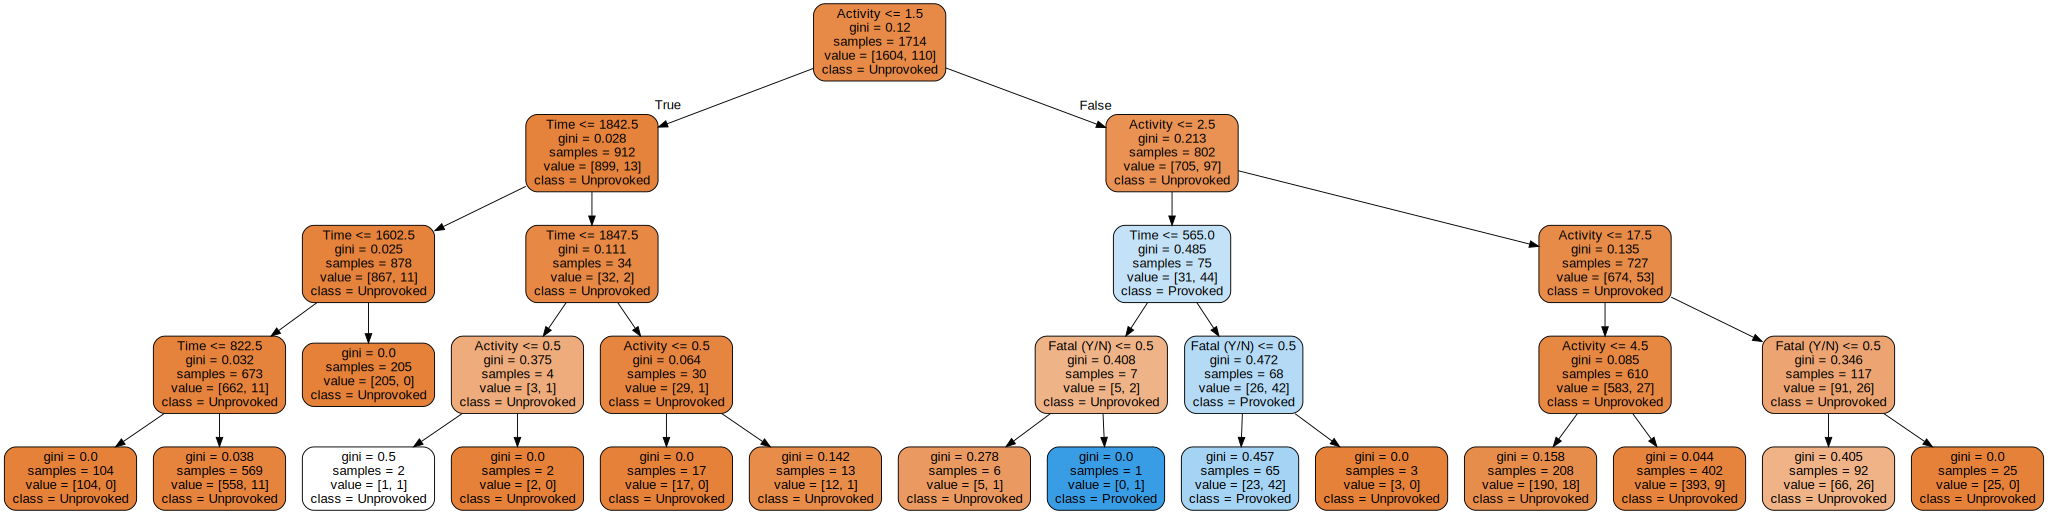

In [429]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=("shark_attack_tree.dot"),
        feature_names=column_names,
        class_names=target_names,
        rounded=True,
        filled=True
    )

Source.from_file("shark_attack_tree.dot")

In [430]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

total_precision_un = 0
total_precision_p = 0
num_times = 200

for i in range(num_times):
    naive_bayes = GaussianNB()
    naive_bayes.fit(X_train, y_train)

    y_pred = naive_bayes.predict(X_test)
    result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
    total_precision_un += result_metrics["Unprovoked"]["precision"]
    total_precision_p += result_metrics["Provoked"]["precision"]

print("Avg unprovoked precision: ", total_precision_un / num_times)
print("Avg provoked precision: ", total_precision_p / num_times)

Avg unprovoked precision:  0.9369747899159695
Avg provoked precision:  0.09523809523809498


In [431]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

total_precision_un = 0
total_precision_p = 0
num_times = 200

for i in range(num_times):
    naive_bayes = MultinomialNB()
    naive_bayes.fit(X_train, y_train)

    y_pred = naive_bayes.predict(X_test)
    result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
    total_precision_un += result_metrics["Unprovoked"]["precision"]
    total_precision_p += result_metrics["Provoked"]["precision"]

print("Avg unprovoked precision: ", total_precision_un / num_times)
print("Avg provoked precision: ", total_precision_p / num_times)

Avg unprovoked precision:  0.9382352941176465
Avg provoked precision:  0.0909090909090911


In [432]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

total_precision_un = 0
total_precision_p = 0
num_times = 200

for i in range(num_times):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    clf = KNeighborsClassifier(n_neighbors = 20)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
    total_precision_un += result_metrics["Unprovoked"]["precision"]
    total_precision_p += result_metrics["Provoked"]["precision"]

print("Avg unprovoked precision: ", total_precision_un / num_times)
print("Avg provoked precision: ", total_precision_p / num_times)


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Avg unprovoked precision:  0.9368696890715917
Avg provoked precision:  0.2160119047619048


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

In [433]:
from sklearn.ensemble import RandomForestClassifier

total_precision_un = 0
total_precision_p = 0
num_times = 10
num_tests = 5

for i in range(1, num_tests):
    total_precision_un = 0
    total_precision_p = 0
    for j in range(num_times):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)
        
        clf = RandomForestClassifier(n_estimators = 100*i)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
        total_precision_un += result_metrics["Unprovoked"]["precision"]
        total_precision_p += result_metrics["Provoked"]["precision"]

    print("Avg unprovoked precision: ", total_precision_un / num_times)
    print("Avg provoked precision: ", total_precision_p / num_times)
    print()

Avg unprovoked precision:  0.9525532222179234
Avg provoked precision:  0.31877013873066506

Avg unprovoked precision:  0.9538435796713631
Avg provoked precision:  0.38938453155073066

Avg unprovoked precision:  0.9571603427937976
Avg provoked precision:  0.3380491978386715

Avg unprovoked precision:  0.9585588361082138
Avg provoked precision:  0.37974926308490775



In [434]:
from sklearn.neural_network import MLPClassifier

total_precision_un = 0
total_precision_p = 0
num_times = 10

for i in range(num_times):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    clf = MLPClassifier(random_state=42, solver='lbfgs', max_iter=200)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
    total_precision_un += result_metrics["Unprovoked"]["precision"]
    total_precision_p += result_metrics["Provoked"]["precision"]

print("Avg unprovoked precision: ", total_precision_un / num_times)
print("Avg provoked precision: ", total_precision_p / num_times)

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

Avg unprovoked precision:  0.9405222167869913
Avg provoked precision:  0.2355050505050505


E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
